# STAT3612 - Assignment 3
- Name: Nyeongmin Lee
- UID: 3035401370
- Date: Dec 6, 2019

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Step 1. Decision tree classifier
- max_depth = 3
- visualize the fitted tree by `export_graphviz`
- training accuracy

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
x_cancer,y_cancer = cancer.data[:,:10],cancer.target

In [3]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_cancer,y_cancer)
print('Training Accuracy: ', accuracy_score(y_cancer,dt.predict(x_cancer)))

Training Accuracy:  0.9578207381370826


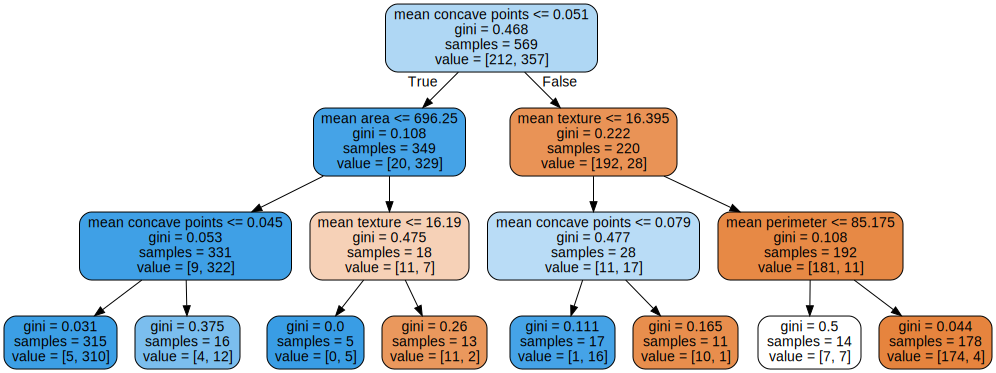

In [4]:
import graphviz
from sklearn.tree import export_graphviz
dot_graph = export_graphviz(
    dt,
    out_file=None,
    feature_names=cancer.feature_names[:10],
    rounded=True,
    filled=True
)
tree_graph = graphviz.Source(dot_graph)
tree_graph

# Step 2. Random forest and Gradient boosting machines

In [5]:
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier(n_estimators=300, oob_score=True)
RF_clf.fit(x_cancer,y_cancer)
print("Training Accuracy:", accuracy_score(y_cancer, RF_clf.predict(x_cancer)))
print("OOB Accuracy:", RF_clf.oob_score_)

Training Accuracy: 1.0
OOB Accuracy: 0.9437609841827768


In [6]:
from sklearn.ensemble import GradientBoostingClassifier

GB_clf = GradientBoostingClassifier()
GB_clf.fit(x_cancer,y_cancer)
print("Training Accuracy:", accuracy_score(y_cancer, GB_clf.predict(x_cancer)))

Training Accuracy: 1.0


# Step 3. Support vector machine with Linear and RBF kernels

In [7]:
from sklearn.svm import SVC

### Linear kernel

In [8]:
clf = SVC(kernel='linear')
clf.fit(x_cancer,y_cancer)
print('Training Accuracy:',accuracy_score(y_cancer,clf.predict(x_cancer)))

Training Accuracy: 0.9191564147627417


### RBF kernel

In [9]:
clf = SVC(kernel = 'rbf', gamma='scale')
clf.fit(x_cancer, y_cancer)
print('Training Accuracy:',accuracy_score(y_cancer,clf.predict(x_cancer)))

Training Accuracy: 0.8875219683655536


# Step 4. Multi-layer perceptron (MLP) classifier

In [10]:
from sklearn.neural_network import MLPClassifier

clf1 = MLPClassifier(hidden_layer_sizes = [5], activation='relu', solver='adam', 
                    learning_rate_init = 0.01, max_iter = 1000, random_state=2019)
clf1.fit(x_cancer, y_cancer)
print("Training Accuracy:", accuracy_score(y_cancer, clf1.predict(x_cancer)))

Training Accuracy: 0.8945518453427065


In [11]:
clf2 = MLPClassifier(hidden_layer_sizes = [10], activation='relu', solver='adam', 
                    learning_rate_init = 0.01, max_iter = 1000, random_state=2019)
clf2.fit(x_cancer, y_cancer)
print("Training Accuracy:", accuracy_score(y_cancer, clf2.predict(x_cancer)))

Training Accuracy: 0.8523725834797891


In [12]:
clf3 = MLPClassifier(hidden_layer_sizes = [5,5], activation='relu', solver='adam', 
                    learning_rate_init = 0.01, max_iter = 1000, random_state=2019)
clf3.fit(x_cancer, y_cancer)
print("Training Accuracy:", accuracy_score(y_cancer, clf3.predict(x_cancer)))

Training Accuracy: 0.8892794376098418


Choose clf1 as the final MLP classifier model.

### Decision:
The random forest and gradient boosting machines both have the highest training accuracy, 1.0.<br>
I will proceed step 5 with **random forest machine**.

# Step 5. Post-hoc interpretability analysis
Random forest machine

In [13]:
import shap
shap.initjs()
# define the explainer
explainer = shap.TreeExplainer(RF_clf)
# calculate the shape value
shap_values = explainer.shap_values(x_cancer)

In [14]:
feature_names = cancer.feature_names[:10]
shap.force_plot(explainer.expected_value[1], shap_values[1][:200], x_cancer[:200], feature_names=feature_names)

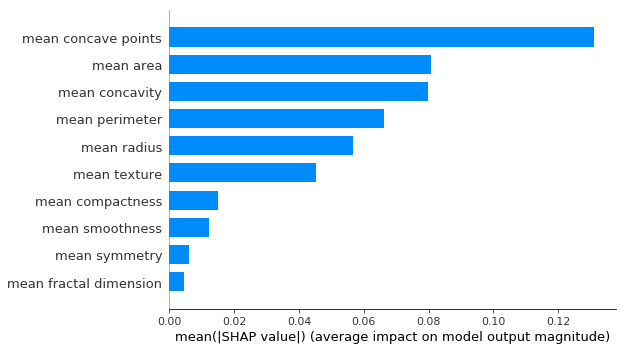

In [15]:
shap.summary_plot(shap_values[1], x_cancer, plot_type="bar",feature_names=feature_names)

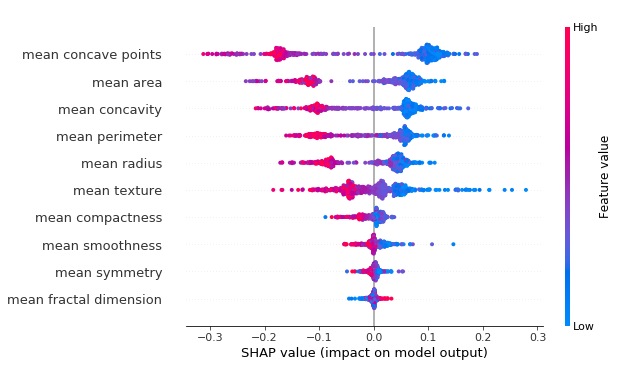

In [16]:
shap.summary_plot(shap_values[1], x_cancer, feature_names)

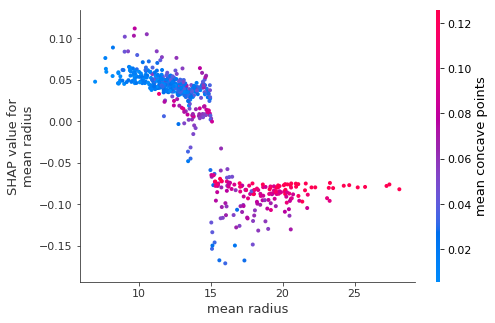

In [17]:
feature_id = 0
shap.dependence_plot(feature_id, shap_values[1], x_cancer,feature_names)

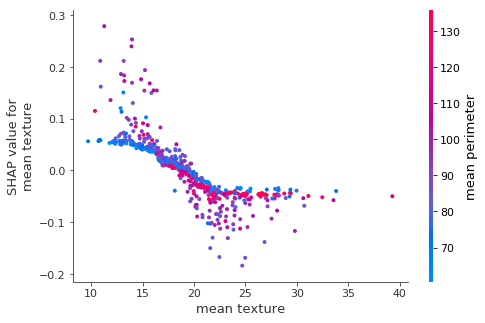

In [18]:
shap.dependence_plot(1, shap_values[1], x_cancer,feature_names)

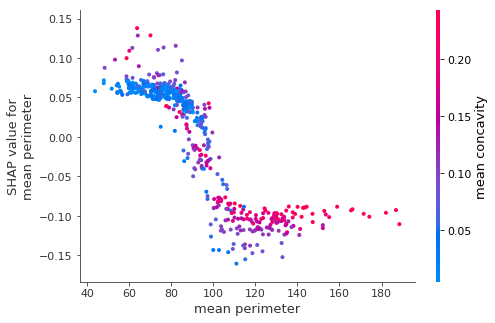

In [19]:
shap.dependence_plot(2, shap_values[1], x_cancer,feature_names)

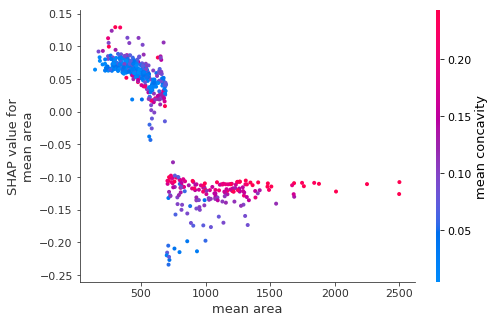

In [20]:
shap.dependence_plot(3, shap_values[1], x_cancer,feature_names)

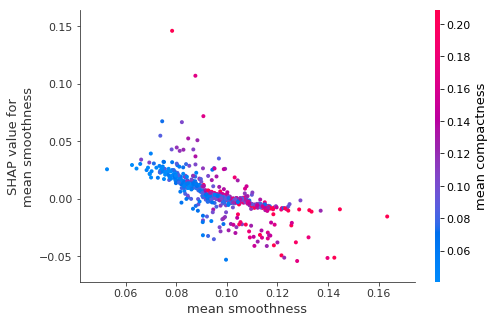

In [21]:
shap.dependence_plot(4, shap_values[1], x_cancer,feature_names)